<a href="https://colab.research.google.com/github/matheusmf1/ECM514_Data_Science/blob/master/aula06_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset Study

In [1]:
#Bibliotecas utilizadas para classificação e exportação da árvore gerada
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#Biblioteca para facilitar a separação dos dataset em dados de traino e teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
#Pandas é uma biblioteca que facilita a ingestão e manipulação de dados
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)


#enabling to plot using plotlib in the notebook
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/Data Science Class/DataSets/iris_data.txt' )
df

,comprimento-sepala,largura-sepala,comprimento-petala,largura-petala,rotulo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
df.rename( columns = { ' rotulo' : 'rotulo' }, inplace = True )

## Alterar as respostas esperadas para 0,1 e 2 


In [4]:
df[ 'rotulo' ].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df['rotulo'] = df['rotulo'].map( { 'Iris-setosa':0 , 'Iris-versicolor':1, 'Iris-virginica':2 } )
df

,comprimento-sepala,largura-sepala,comprimento-petala,largura-petala,rotulo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


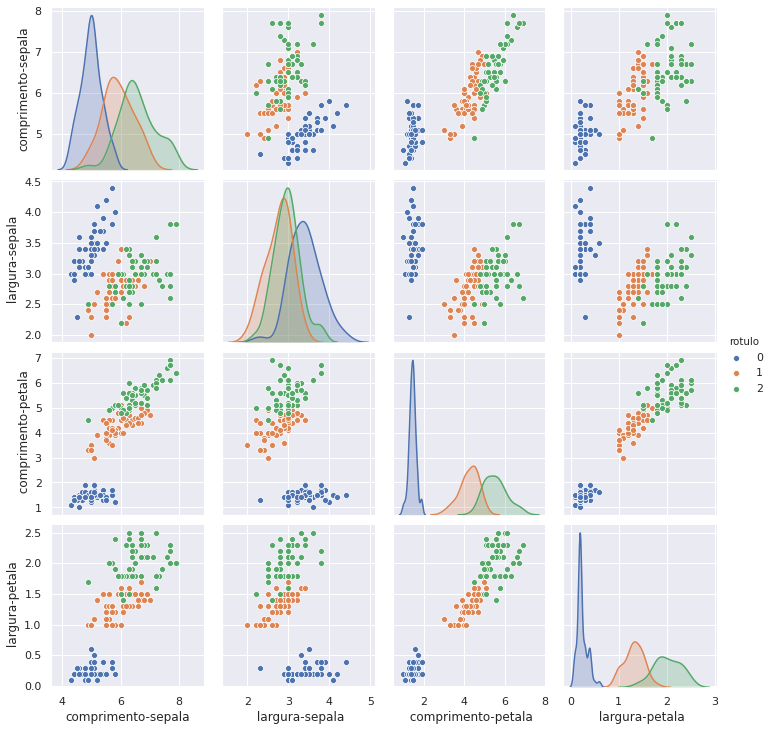

In [6]:
sns.pairplot( df, hue='rotulo' )

In [7]:
df.columns

Index(['comprimento-sepala', ' largura-sepala', ' comprimento-petala',
       ' largura-petala', 'rotulo'],
      dtype='object')

In [8]:
nome_features = df.columns[ :4 ]
nome_features

Index(['comprimento-sepala', ' largura-sepala', ' comprimento-petala',
       ' largura-petala'],
      dtype='object')

In [9]:
df_x = df.filter( nome_features )
df_x.head()

,comprimento-sepala,largura-sepala,comprimento-petala,largura-petala
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df_y = df[ df.columns[4] ]
df_y.head()

0    0
1    0
2    0
3    0
4    0
Name: rotulo, dtype: int64

In [11]:
df_y.shape

(150,)

In [0]:
x_treino_dummy = df_x[:105]
x_teste_dummy = df_x[105:]

y_treino_dummy = df_y[:105]
y_teste_dummy = df_y[105:]

#### Criando um classificador

In [0]:
classificador_dummy = DecisionTreeClassifier()

#### Treinando o modelo

In [14]:
classificador_dummy.fit( x_treino_dummy, y_treino_dummy )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### Score do treinamento

In [15]:
classificador_dummy.score( x_treino_dummy, y_treino_dummy )

1.0

#### Score do teste

Os dados não estão embaralhados, logo o modelo só reconhecerá as classificações dos 105 primeiros, deixando os ultimos dados de fora. 

In [16]:
classificador_dummy.score( x_teste_dummy, y_teste_dummy )

0.7333333333333333

### Vamos resolver esse problema

In [0]:
#x_treino, x_teste, y_treino, y_teste =  train_test_split( df_x, df_y, test_size = 0.3, random_state = 42 ) # score 1.0

x_treino, x_teste, y_treino, y_teste =  train_test_split( df_x, df_y, test_size = 0.3, random_state = 30 )

In [18]:
x_treino.head()

,comprimento-sepala,largura-sepala,comprimento-petala,largura-petala
59,5.2,2.7,3.9,1.4
94,5.6,2.7,4.2,1.3
73,6.1,2.8,4.7,1.2
89,5.5,2.5,4.0,1.3
88,5.6,3.0,4.1,1.3


In [19]:
x_teste.head()

,comprimento-sepala,largura-sepala,comprimento-petala,largura-petala
20,5.4,3.4,1.7,0.2
5,5.4,3.9,1.7,0.4
3,4.6,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
82,5.8,2.7,3.9,1.2


In [20]:
y_treino.head()

59    1
94    1
73    1
89    1
88    1
Name: rotulo, dtype: int64

In [21]:
y_teste.head()

20     0
5      0
3      0
101    2
82     1
Name: rotulo, dtype: int64

### Criando um novo Classificador

In [22]:
classificador = DecisionTreeClassifier()

classificador.fit( x_treino, y_treino )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
classificador.score( x_teste, y_teste )

0.9333333333333333

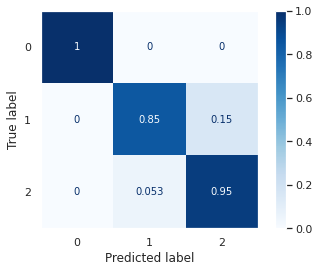

In [24]:
plot_confusion_matrix( estimator = classificador, X = x_teste, y_true = y_teste, display_labels = df['rotulo'].unique(), cmap=plt.cm.Blues, normalize = 'true' )
plt.grid( False )

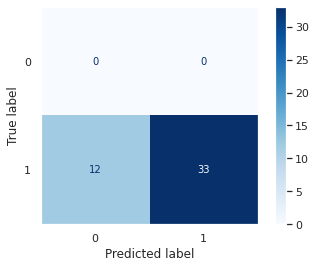

In [25]:
plot_confusion_matrix(estimator=classificador_dummy, X=x_teste_dummy, y_true=y_teste_dummy, display_labels=df['rotulo'].unique(), cmap=plt.cm.Blues, normalize = None )
plt.grid( False )

In [0]:
import graphviz
dot_graph = export_graphviz( classificador, out_file='iris.dot' )

In [27]:
classificador.predict( np.array( [1,2,3,4,1] ) )

ValueError: ignored